In [1]:
import pandas as pd
import numpy as np
import sklearn as sns
import seaborn as sn
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix  # For evaluation

In [2]:
dt=pd.read_csv('Social_Network_Ads.csv')
dt

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


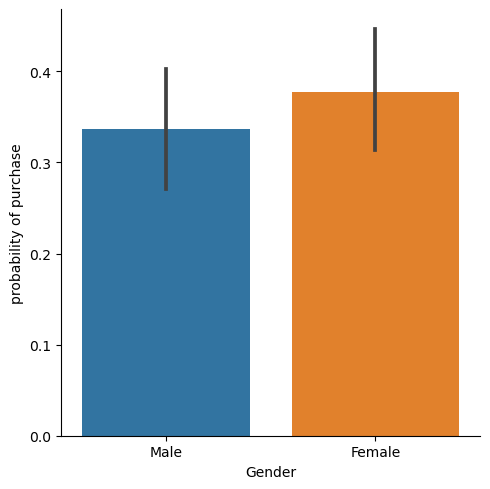

In [4]:
g=sn.catplot(x='Gender',y='Purchased',data=dt, kind='bar',height=5)
g.set_ylabels('probability of purchase')
plt.show()

In [5]:
dt.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dt.shape

(400, 5)

In [7]:
dt.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [8]:
dt.isnull

<bound method DataFrame.isnull of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [9]:
print(dt.isnull().sum())


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
categorical_cols = dt.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender'], dtype='object')

In [12]:
dt = pd.get_dummies(dt, drop_first=True)


In [13]:
dt


,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [14]:
dt.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000


In [15]:
X = dt.drop(columns=['Purchased','User ID'])

In [16]:
Y=dt['Purchased']

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
count=dt['Gender_Male'].value_counts()

In [19]:
count

0    204
1    196
Name: Gender_Male, dtype: int64

In [20]:
X

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [21]:
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
xtrain[numeric_cols] = scaler.fit_transform(xtrain[numeric_cols])
xtest[numeric_cols] = scaler.transform(xtest[numeric_cols])

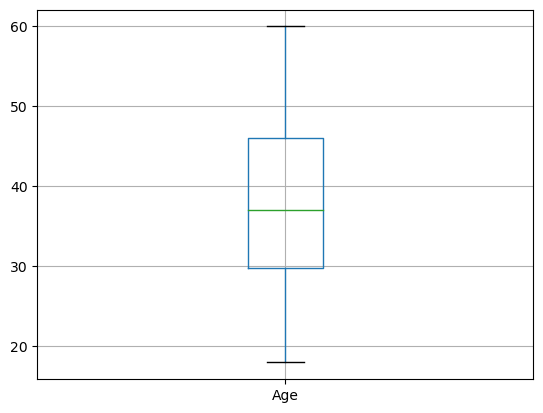

In [22]:

dt.boxplot(column=['Age'])
plt.show()

In [23]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [24]:
y_pred_train = logreg.predict(xtrain)
y_pred_test = logreg.predict(xtest)

In [25]:
print("Training Accuracy:", accuracy_score(ytrain, y_pred_train))
print("Testing Accuracy:", accuracy_score(ytest, y_pred_test))


Training Accuracy: 0.821875
Testing Accuracy: 0.8875


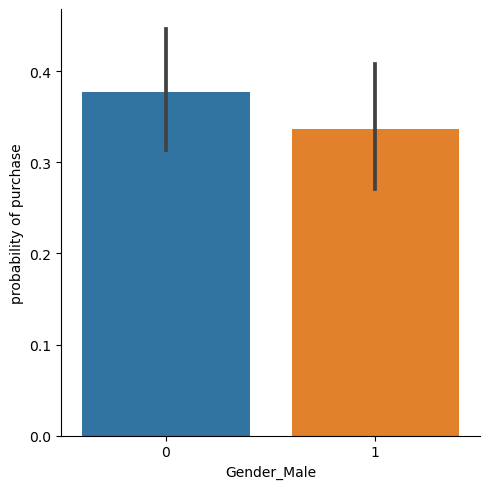

In [26]:

g=sn.catplot(x='Gender_Male',y='Purchased',data=dt, kind='bar',height=5)
g.set_ylabels('probability of purchase')
plt.show()

In [30]:
print("\n=== Model Evaluation ===")
print(f"Training Accuracy: {accuracy_score(ytrain, y_pred_train):.4f}")
print(f"Testing Accuracy: {accuracy_score(ytest, y_pred_test):.4f}")



=== Model Evaluation ===
Training Accuracy: 0.8219
Testing Accuracy: 0.8875


In [ ]:
conf_matrix = confusion_matrix(ytest, y_pred_test)
plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

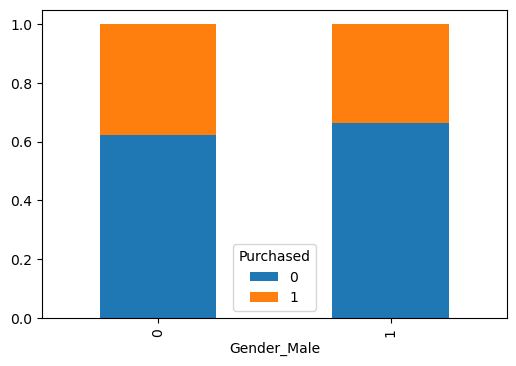

In [28]:
m=pd.crosstab(dt['Gender_Male'],dt['Purchased'],normalize='index')
m.plot.bar(figsize=(6,4),stacked=True)
plt.show()